# Perceptron

#### This notebook explores different examples of perceptrons

## perceptron.py

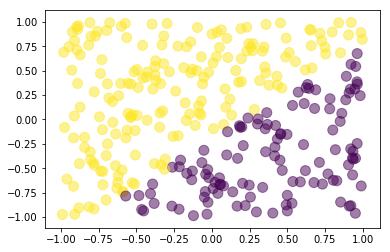

final w: [-4.4526125   4.47839941] final b: 1.0 epochs: 54 / 1000


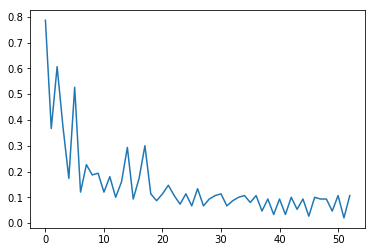

Training time: 0:00:00.285000
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00 Train size: 150
Test accuracy: 0.986666666667
Time to compute test accuracy: 0:00:00 Test size: 150
Reading in and transforming data...
final w: [ -9.76746421e-01  -8.53561696e-01   5.71733634e-01  -7.26436039e-01
   7.74923879e-01  -1.65411346e-01  -9.66468076e-01   7.80127352e-01
  -9.31387770e-01  -9.13199357e-01  -4.55876878e-01   1.66966649e+00
  -2.68739719e-02   1.55925200e-01   6.14097289e-01   2.36704949e-01
  -3.86933959e-01  -1.31330607e-01  -2.78160644e-01  -1.54475802e+00
   9.17038093e-01  -4.46579985e-01  -8.61205301e-01   9.22337647e-01
  -1.99060971e+00  -1.09151320e+00  -3.32901683e-01  -2.59209603e-01
   1.19954139e+00   2.98468288e-01  -1.13633041e+00   1.94529129e+00
  -4.57952420e-01   1.25258977e-01  -1.62233417e+00   1.01738727e+00
   2.66034192e-01  -2.59009997e-01   1.65969087e+00  -1.30304498e+00
   1.49555095e+00  -1.24001462e+00  -5.19017778e-01   9.56105433e-02
   2.8

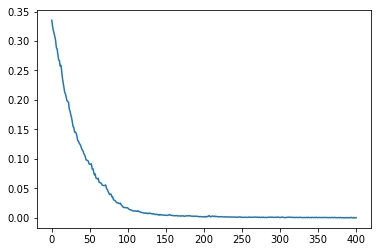

MNIST train accuracy: 1.0

XOR results:
final w: [ 0.09051005  1.64273935] final b: 0.0 epochs: 1000 / 1000


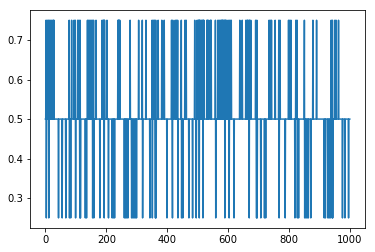

XOR accuracy: 0.5


In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
from util import get_data as get_mnist
from datetime import datetime


def get_data():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y


def get_simple_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    return X, Y


class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):
        # solution
        # self.w = np.array([-0.5, 0.5])
        # self.b = 0.1

        # initialize random weights
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []
        for epoch in range(epochs):
            # determine which samples are misclassified, if any
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                # we are done!
                break

            # choose a random incorrect sample
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]

            # cost is incorrect rate
            c = len(incorrect) / float(N)
            costs.append(c)
        print("final w:", self.w, "final b:", self.b, "epochs:", (epoch+1), "/", epochs)
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)


if __name__ == '__main__':
    # linearly separable data
    X, Y = get_data()
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = Perceptron()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


    # mnist
    X, Y = get_mnist()
    idx = np.logical_or(Y == 0, Y == 1)
    X = X[idx]
    Y = Y[idx]
    Y[Y == 0] = -1
    model = Perceptron()
    t0 = datetime.now()
    model.fit(X, Y, learning_rate=1e-2)
    print("MNIST train accuracy:", model.score(X, Y))


    # xor data
    print("")
    print("XOR results:")
    X, Y = get_simple_xor()
    Y[Y == 0] = -1
    model.fit(X, Y)
    print("XOR accuracy:", model.score(X, Y))

